In [18]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


In [2]:
df = pd.read_csv('/Users/jkenglish/Desktop/StormEventsData/StormEvents_Combined.csv')

df

,Unnamed: 0,STATE,YEAR,MONTH_NAME,EVENT_TYPE,COUNTY_NAME,COUNTY_TIMEZONE,DAMAGE_PROPERTY,DAMAGE_CROPS
0,0,NEW HAMPSHIRE,2013,February,Winter Weather,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
1,1,NEW HAMPSHIRE,2013,December,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
2,2,NEW HAMPSHIRE,2013,March,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
3,3,NEW HAMPSHIRE,2013,October,Strong Wind,EASTERN HILLSBOROUGH,EST-5,3000.0,0.0
4,4,NEW HAMPSHIRE,2013,February,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
...,...,...,...,...,...,...,...,...,...
608742,56395,IOWA,2006,October,Hail,MITCHELL,CST-6,65000.0,80000.0
608743,56396,IOWA,2006,October,Hail,HOWARD,CST-6,50000.0,75000.0
608744,56397,IOWA,2006,October,Hail,WINNESHIEK,CST-6,5000.0,10000.0
608745,56398,IOWA,2006,October,Hail,MITCHELL,CST-6,80000.0,100000.0


In [44]:
df.shape

(608747, 9)

In [15]:
df2 = df.drop(['Unnamed: 0'],axis=1)

df2

,STATE,YEAR,MONTH_NAME,EVENT_TYPE,COUNTY_NAME,COUNTY_TIMEZONE,DAMAGE_PROPERTY,DAMAGE_CROPS
0,NEW HAMPSHIRE,2013,February,Winter Weather,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
1,NEW HAMPSHIRE,2013,December,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
2,NEW HAMPSHIRE,2013,March,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
3,NEW HAMPSHIRE,2013,October,Strong Wind,EASTERN HILLSBOROUGH,EST-5,3000.0,0.0
4,NEW HAMPSHIRE,2013,February,Heavy Snow,EASTERN HILLSBOROUGH,EST-5,0.0,0.0
...,...,...,...,...,...,...,...,...
608742,IOWA,2006,October,Hail,MITCHELL,CST-6,65000.0,80000.0
608743,IOWA,2006,October,Hail,HOWARD,CST-6,50000.0,75000.0
608744,IOWA,2006,October,Hail,WINNESHIEK,CST-6,5000.0,10000.0
608745,IOWA,2006,October,Hail,MITCHELL,CST-6,80000.0,100000.0


In [14]:
df2.shape

(608747, 8)

In [16]:
df2['STATE'].unique()

array(['NEW HAMPSHIRE', 'MISSOURI', 'KANSAS', 'TEXAS', 'HAWAII',
       'COLORADO', 'ILLINOIS', 'MONTANA', 'MICHIGAN', 'WYOMING',
       'MARYLAND', 'VIRGINIA', 'IOWA', 'NEBRASKA', 'LAKE ST CLAIR',
       'LAKE HURON', 'DISTRICT OF COLUMBIA', 'NEW YORK', 'PENNSYLVANIA',
       'ATLANTIC NORTH', 'GULF OF MEXICO', 'NEW MEXICO', 'OKLAHOMA',
       'WEST VIRGINIA', 'WISCONSIN', 'MINNESOTA', 'ARKANSAS',
       'MISSISSIPPI', 'GEORGIA', 'TENNESSEE', 'LAKE SUPERIOR',
       'RHODE ISLAND', 'MASSACHUSETTS', 'FLORIDA', 'ALABAMA', 'MAINE',
       'ARIZONA', 'OHIO', 'VERMONT', 'LOUISIANA', 'INDIANA',
       'NORTH CAROLINA', 'SOUTH DAKOTA', 'CALIFORNIA', 'UTAH',
       'NORTH DAKOTA', 'KENTUCKY', 'ATLANTIC SOUTH', 'IDAHO',
       'CONNECTICUT', 'LAKE MICHIGAN', 'OREGON', 'ALASKA',
       'SOUTH CAROLINA', 'AMERICAN SAMOA', 'NEVADA', 'WASHINGTON', 'GUAM',
       'HAWAII WATERS', 'PUERTO RICO', 'VIRGIN ISLANDS', 'NEW JERSEY',
       'LAKE ERIE', 'E PACIFIC', 'DELAWARE', 'LAKE ONTARIO',
       'GULF

In [17]:
df2['EVENT_TYPE'].unique()

array(['Winter Weather', 'Heavy Snow', 'Strong Wind', 'High Wind',
       'Blizzard', 'Hail', 'Flood', 'Thunderstorm Wind', 'Drought',
       'High Surf', 'Winter Storm', 'Flash Flood', 'Tornado', 'Dense Fog',
       'Marine Thunderstorm Wind', 'Debris Flow', 'Excessive Heat',
       'Cold/Wind Chill', 'Lake-Effect Snow', 'Ice Storm',
       'Marine High Wind', 'Heavy Rain', 'Funnel Cloud', 'Rip Current',
       'Waterspout', 'Frost/Freeze', 'Wildfire', 'Lightning',
       'Dust Storm', 'Heat', 'Extreme Cold/Wind Chill', 'Coastal Flood',
       'Tropical Storm', 'Dust Devil', 'Avalanche', 'Marine Hail',
       'Marine Dense Fog', 'Marine Strong Wind', 'Hurricane',
       'Freezing Fog', 'Astronomical Low Tide', 'Sleet', 'Tsunami',
       'Sneakerwave', 'Storm Surge/Tide', 'Dense Smoke', 'Seiche',
       'Volcanic Ashfall', 'Landslide', 'Tropical Depression',
       'Hurricane (Typhoon)', 'Marine Tropical Storm',
       'Marine Hurricane/Typhoon', 'HAIL FLOODING',
       'THUNDERSTORM W

In [19]:
label_encoder = preprocessing.LabelEncoder()
  
df2['STATE']= label_encoder.fit_transform(df2['STATE'])
  
df2['STATE'].unique()

array([43, 39, 24, 59, 18,  8, 21, 40, 36, 67, 34, 63, 23, 41, 30, 27, 11,
       46, 52,  5, 17, 45, 50, 65, 66, 37,  4, 38, 14, 58, 31, 54, 35, 13,
        0, 33,  3, 49, 61, 32, 22, 47, 56,  7, 60, 48, 25,  6, 20,  9, 28,
       51,  1, 55,  2, 42, 64, 15, 19, 53, 62, 44, 26, 12, 10, 29, 16, 57])

In [20]:
df2['EVENT_TYPE']= label_encoder.fit_transform(df2['EVENT_TYPE'])
  
df2['EVENT_TYPE'].unique()


array([68, 23, 47, 25,  2, 20, 14, 59,  8, 24, 67, 13, 60,  6, 39,  5, 11,
        4, 29, 28, 35, 22, 17, 42, 65, 16, 66, 32, 10, 21, 12,  3, 62,  9,
        1, 34, 33, 38, 26, 15,  0, 44, 63, 45, 46,  7, 43, 64, 31, 61, 27,
       41, 36, 18, 54, 52, 49, 48, 50, 57, 56, 51, 53, 30, 40, 58, 55, 19,
       37])

In [22]:
df2['MONTH_NAME']= label_encoder.fit_transform(df2['MONTH_NAME'])
  
df2['MONTH_NAME'].unique()


array([ 3,  2,  7, 10,  9,  4,  6,  8,  0,  1,  5, 11])

In [24]:
df2['COUNTY_NAME']= label_encoder.fit_transform(df2['COUNTY_NAME'])
  
df2['COUNTY_NAME'].unique()


array([1281, 1770, 2039, ..., 4104, 4593, 2262])

In [26]:
df2['COUNTY_TIMEZONE']= label_encoder.fit_transform(df2['COUNTY_TIMEZONE'])
  
df2['COUNTY_TIMEZONE'].unique()


array([12,  7, 16, 19, 23,  0, 26, 14,  2,  6, 11,  9, 18,  3, 20, 22, 17,
       13,  1, 24, 15,  8,  4, 21, 10, 25,  5])

In [49]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

X = df2.drop('DAMAGE_PROPERTY',axis=1)

y = df2['DAMAGE_PROPERTY']

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

from sklearn.ensemble import RandomForestRegressor

model_randomforestregressor = RandomForestRegressor()

model_randomforestregressor.fit(X_train, y_train)



RandomForestRegressor()

In [50]:
predict_randomforestregressor = model_randomforestregressor.predict(X_test)

In [51]:
error = np.sqrt(mean_squared_error(y_test,predict_randomforestregressor))

print("${:,.02f}".format(error))

$38,568,443.30


In [52]:
model_linear = LinearRegression()

model_linear.fit(X_train, y_train)



LinearRegression()

In [53]:
predict_linear = model_linear.predict(X_test)

In [54]:
error_linear = np.sqrt(mean_squared_error(y_test,predict_linear))

print("${:,.02f}".format(error_linear))

$25,401,889.91


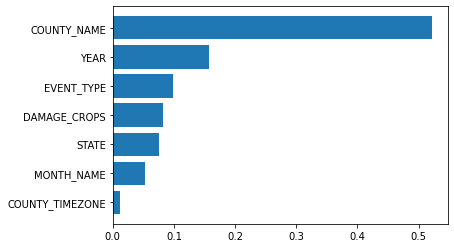

In [55]:
#Feature Importance

importances = model_randomforestregressor.feature_importances_


indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

